# Exploration der FastText Embeddings 2

- ohne Bigramme
- vector_size: 200
- window: 5
- min_count: 2
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import FastText
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

ft1 = FastText.load(os.path.join('trained_models/FastText2', '2ft1.model'))
ft2 = FastText.load(os.path.join('trained_models/FastText2', '2ft2.model'))
ft3 = FastText.load(os.path.join('trained_models/FastText2', '2ft3.model'))
ft4 = FastText.load(os.path.join('trained_models/FastText2', '2ft4.model'))
ft5 = FastText.load(os.path.join('trained_models/FastText2', '2ft5.model'))
ft6 = FastText.load(os.path.join('trained_models/FastText2', '2ft6.model'))
ft7 = FastText.load(os.path.join('trained_models/FastText2', '2ft7.model'))
ft8 = FastText.load(os.path.join('trained_models/FastText2', '2ft8.model'))
ft9 = FastText.load(os.path.join('trained_models/FastText2', '2ft9.model'))
ft10 = FastText.load(os.path.join('trained_models/FastText2', '2ft10.model'))
ft11 = FastText.load(os.path.join('trained_models/FastText2', '2ft11.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1985', '1986-2000', '2001-2021']

In [4]:
models = [ft1, ft2, ft3, ft4, ft5, ft6, ft7, ft8, ft9, ft10, ft11] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')
essere0 = compare_cos(periods, models, 'essere', 'molto')
avere0 = compare_cos(periods, models, 'avere', 'molto')

In [8]:
spesso0

{'1700-1750': 0.3853517770767212,
 '1751-1800': 0.5386884212493896,
 '1801-1825': 0.5490827560424805,
 '1826-1850': 0.5779314041137695,
 '1851-1875': 0.5034130215644836,
 '1876-1900': 0.5572182536125183,
 '1901-1925': 0.5031614303588867,
 '1926-1950': 0.5120582580566406,
 '1951-1985': 0.4490538239479065,
 '1986-2000': 0.4953758418560028,
 '2001-2021': 0.5689789056777954}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0, essere0, avere0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

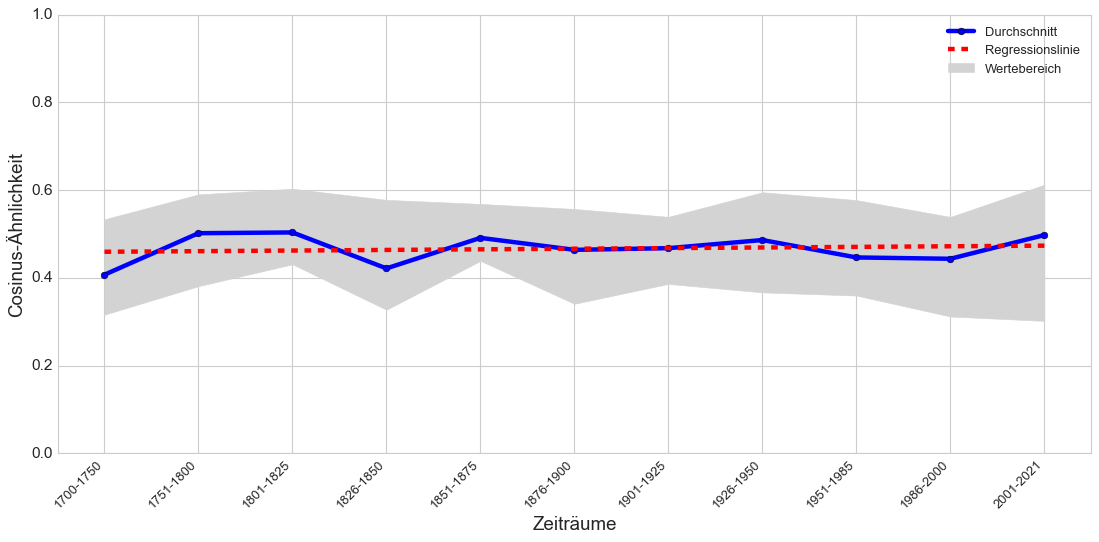

In [14]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [15]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

#domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])
domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [16]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [17]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [18]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [19]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [20]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [21]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

In [22]:
# essere 

essere1 = compare_cos(periods, models, 'essere', 'angoscia')
essere2 = compare_cos(periods, models, 'essere', 'atterrire')
essere3 = compare_cos(periods, models, 'essere', 'panico')
essere4 = compare_cos(periods, models, 'essere', 'paura')
essere5 = compare_cos(periods, models, 'essere', 'raccapricciare')
essere6 = compare_cos(periods, models, 'essere', 'schifo')
essere7 = compare_cos(periods, models, 'essere', 'sgomentare')
essere8 = compare_cos(periods, models, 'essere', 'sgomento')
essere9 = compare_cos(periods, models, 'essere', 'spaventare')
essere10 = compare_cos(periods, models, 'essere', 'spavento')
essere11 = compare_cos(periods, models, 'essere', 'terrore')

#essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])
essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])

# Durchschnitt pro Zeitraum
essere_mean = dict(essere_df.mean())

# min pro Zeitraum
essere_min = dict(essere_df.min())
essere_min_list = [float(x) for x in list(essere_min.values())]

#max pro Zeitraum 
essere_max = dict(essere_df.max())
essere_max_list = [float(x) for x in list(essere_max.values())]

In [23]:
# avere 

avere1 = compare_cos(periods, models, 'avere', 'angoscia')
avere2 = compare_cos(periods, models, 'avere', 'atterrire')
avere3 = compare_cos(periods, models, 'avere', 'panico')
avere4 = compare_cos(periods, models, 'avere', 'paura')
avere5 = compare_cos(periods, models, 'avere', 'raccapricciare')
avere6 = compare_cos(periods, models, 'avere', 'schifo')
avere7 = compare_cos(periods, models, 'avere', 'sgomentare')
avere8 = compare_cos(periods, models, 'avere', 'sgomento')
avere9 = compare_cos(periods, models, 'avere', 'spaventare')
avere10 = compare_cos(periods, models, 'avere', 'spavento')
avere11 = compare_cos(periods, models, 'avere', 'terrore')

#avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])
avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])

# Durchschnitt pro Zeitraum
avere_mean = dict(avere_df.mean())

# min pro Zeitraum
avere_min = dict(avere_df.min())
avere_min_list = [float(x) for x in list(avere_min.values())]

#max pro Zeitraum 
avere_max = dict(avere_df.max())
avere_max_list = [float(x) for x in list(avere_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [24]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, 
                                spesso_mean, essere_mean, avere_mean])
control_mean = dict(control_mean_df.mean())

In [25]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, 
                               spesso_min, essere_min, avere_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [26]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, 
                               spesso_max, essere_max, avere_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

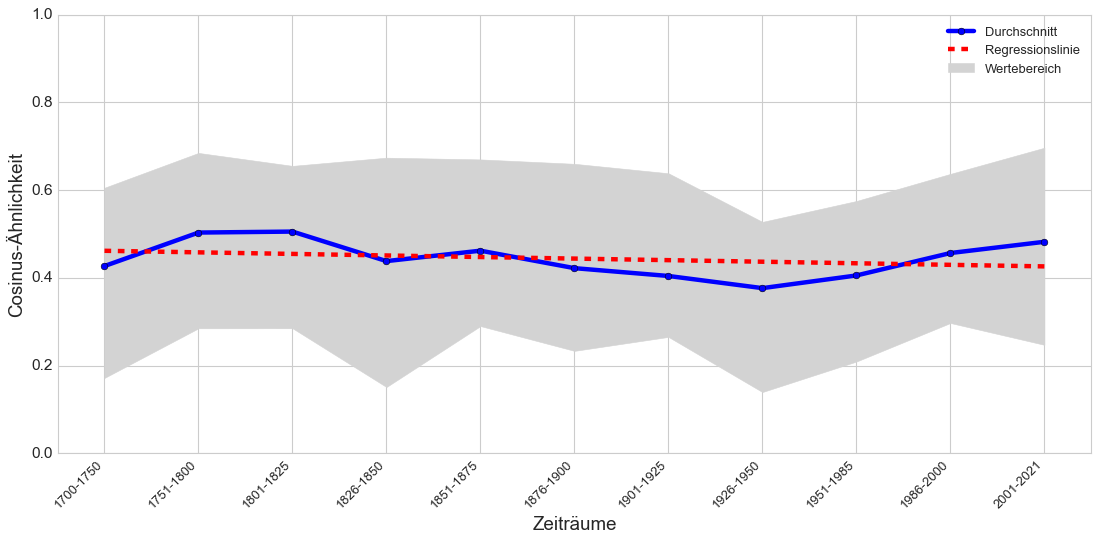

In [27]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [28]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(ferocemente, 0.950305163860321)","(ferocemente, 0.9802959561347961)","(ferocemente, 0.9774529933929443)","(audacemente, 0.9760434627532959)","(ferocemente, 0.967006504535675)","(audacemente, 0.9715633392333984)","(ferocemente, 0.9695306420326233)","(ferocemente, 0.9612639546394348)","(ferocemente, 0.9678488373756409)","(ferocemente, 0.9764952063560486)","(ferocemente, 0.9833566546440125)"
1,"(fugacemente, 0.9479410648345947)","(audacemente, 0.9769219160079956)","(fugacemente, 0.9698824882507324)","(sagacemente, 0.9710069298744202)","(infamemente, 0.9535279273986816)","(ferocemente, 0.9666372537612915)","(infamemente, 0.9476430416107178)","(fugacemente, 0.9388082027435303)","(crudelmente, 0.937777578830719)","(crudelmente, 0.948346734046936)","(dolcemente, 0.9507009387016296)"
2,"(audacemente, 0.9473044872283936)","(tenacemente, 0.9656117558479309)","(alacremente, 0.9595373272895813)","(acremente, 0.9667079448699951)","(audacemente, 0.9486007690429688)","(tenacemente, 0.9413987994194031)","(audacemente, 0.9374086856842041)","(fremente, 0.9357356429100037)","(umilmente, 0.9357471466064453)","(infelicemente, 0.9405804872512817)","(tenacemente, 0.950477659702301)"
3,"(acremente, 0.941881537437439)","(acremente, 0.964551568031311)","(tenacemente, 0.9547139406204224)","(ferocemente, 0.9659873843193054)","(sagacemente, 0.9482424855232239)","(rudemente, 0.940972089767456)","(fugacemente, 0.9368783235549927)","(alacremente, 0.9297465085983276)","(svenevolmente, 0.9319872856140137)","(dolcemente, 0.9374769330024719)","(minacciosamente, 0.9485394954681396)"
4,"(turpemente, 0.9379540085792542)","(impunemente, 0.9609237313270569)","(acremente, 0.946397066116333)","(enormemente, 0.9656849503517151)","(tenacemente, 0.9350571632385254)","(acremente, 0.9368667006492615)","(unanimemente, 0.9319671392440796)","(soffocantemente, 0.9267315864562988)","(voracemente, 0.9308679103851318)","(stupendamente, 0.9327526092529297)","(orribilmente, 0.9468346238136292)"
5,"(celeremente, 0.9365816712379456)","(velocemente, 0.9568246006965637)","(veemente, 0.9452615976333618)","(turpemente, 0.9621315002441406)","(precocemente, 0.9322976469993591)","(innocentemente, 0.9324242472648621)","(alacremente, 0.929631233215332)","(acremente, 0.9266888499259949)","(orribilmente, 0.9306547045707703)","(orrendamente, 0.9272518157958984)","(voracemente, 0.9433153867721558)"
6,"(impunemente, 0.933005690574646)","(acerbamente, 0.9537215232849121)","(gagliardemente, 0.9420333504676819)","(ferventemente, 0.9618117213249207)","(infelicemente, 0.9319080114364624)","(fugacemente, 0.9323644638061523)","(innocentemente, 0.9286193251609802)","(dolorosamente, 0.9237574934959412)","(gelosamente, 0.9214922785758972)","(orribilmente, 0.9268978238105774)","(terribilmente, 0.9413629770278931)"
7,"(tenacemente, 0.9298285841941833)","(placidamente, 0.9513552784919739)","(velocemente, 0.9410807490348816)","(infallantemente, 0.9603188037872314)","(innocentemente, 0.9316926598548889)","(precocemente, 0.9317232966423035)","(tenacemente, 0.9284527897834778)","(tremantemente, 0.9218708872795105)","(impunemente, 0.9196945428848267)","(infantilmente, 0.9164363741874695)","(brutalmente, 0.9372686743736267)"
8,"(orridamente, 0.928532063961029)","(insolentemente, 0.9507089853286743)","(infamemente, 0.9402166604995728)","(violentemente, 0.9578713178634644)","(veracemente, 0.9314606189727783)","(veracemente, 0.9293065071105957)","(perennemente, 0.9279760718345642)","(follemente, 0.9207231402397156)","(orgogliosamente, 0.9196324944496155)","(felicemente, 0.9153863191604614)","(angosciosamente, 0.9363731741905212)"
9,"(ondifremente, 0.9260087609291077)","(sdegnosamente, 0.9505314230918884)","(mollemente, 0.9401118159294128)","(alacremente, 0.9558761119842529)","(pertinacemente, 0.9309940338134766)","(invincibilmente, 0.9290636777877808)","(acremente, 0.9272881746292114)","(insolentemente, 0.9

In [29]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.4706767201423645,
 '1751-1800': 0.512152373790741,
 '1801-1825': 0.5436099171638489,
 '1826-1850': 0.523448646068573,
 '1851-1875': 0.4603433907032013,
 '1876-1900': 0.49834904074668884,
 '1901-1925': 0.46876150369644165,
 '1926-1950': 0.3822202682495117,
 '1951-1985': 0.4680993854999542,
 '1986-2000': 0.4811757802963257,
 '2001-2021': 0.5324914455413818}

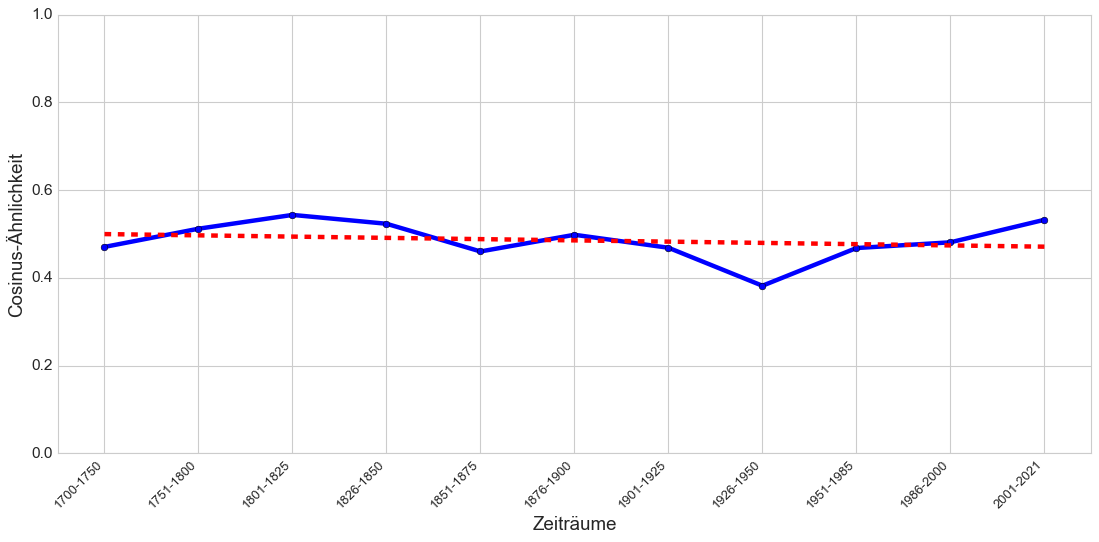

In [30]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

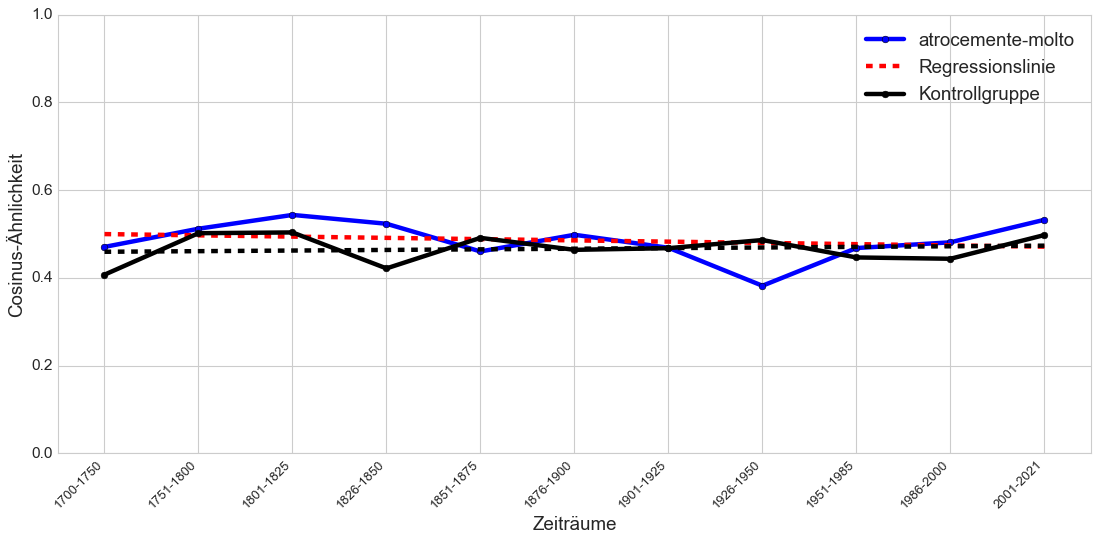

In [31]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [32]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [33]:
atrocemente1

{'1700-1750': 0.616691529750824,
 '1751-1800': 0.735316812992096,
 '1801-1825': 0.5839932560920715,
 '1826-1850': 0.5500656962394714,
 '1851-1875': 0.637506365776062,
 '1876-1900': 0.6027297377586365,
 '1901-1925': 0.600502610206604,
 '1926-1950': 0.5249952673912048,
 '1951-1985': 0.551741361618042,
 '1986-2000': 0.6860231161117554,
 '2001-2021': 0.8133339881896973}

In [34]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

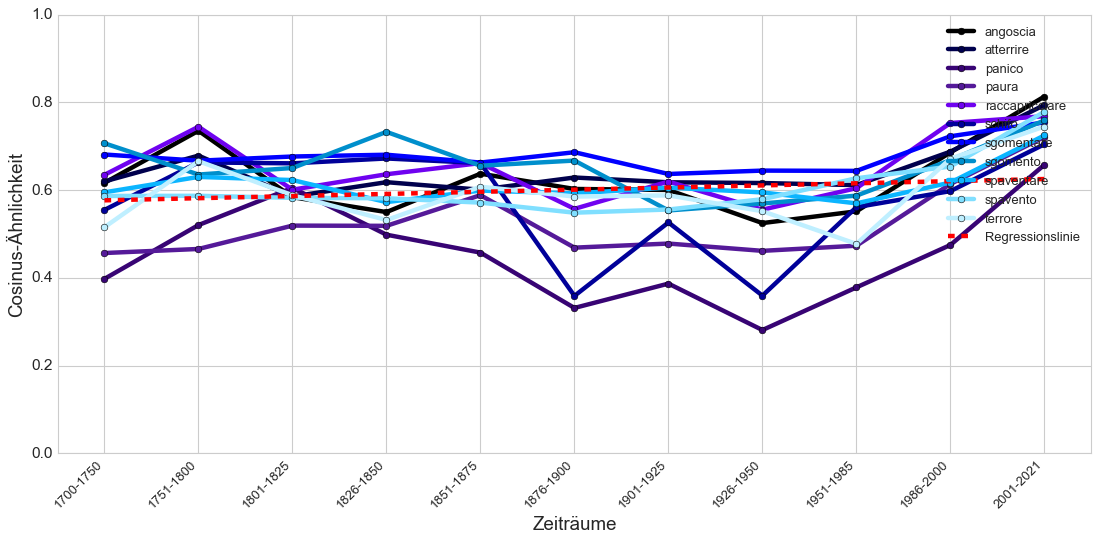

In [35]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

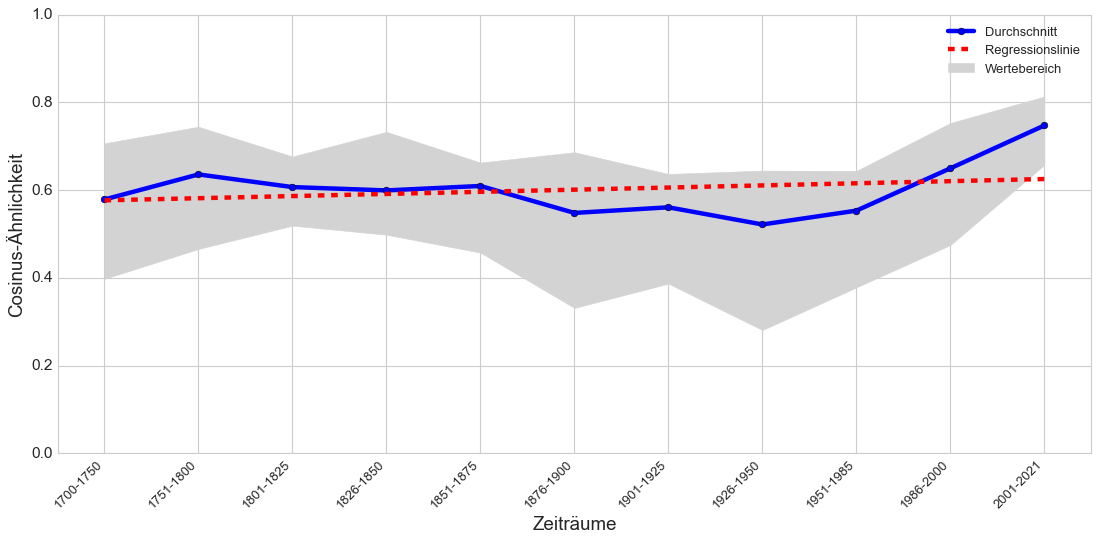

In [36]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

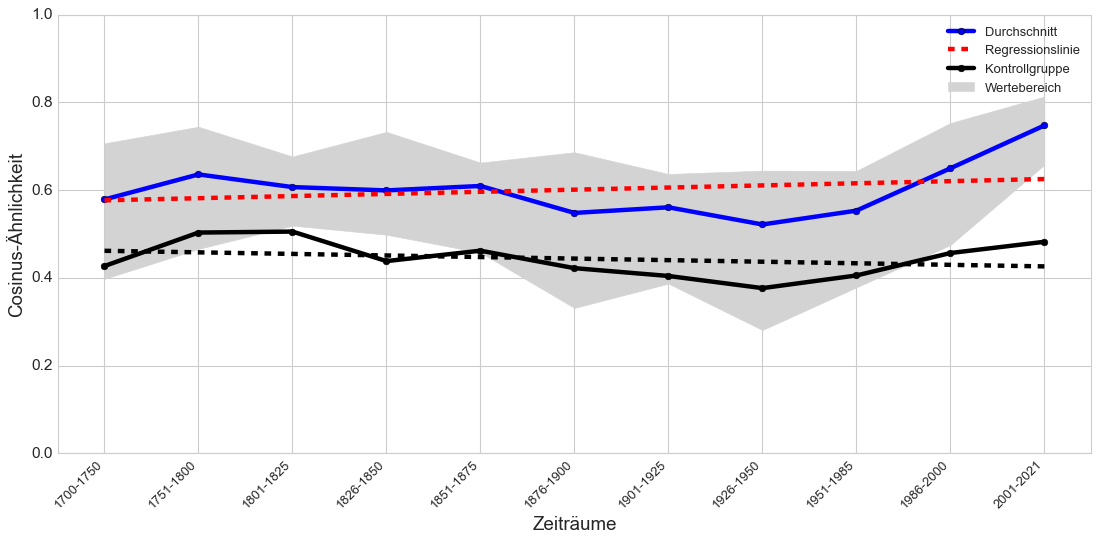

In [37]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### formidabilmente

In [38]:
compare_words(periods, models, 'formidabilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(irreparabilmente, 0.9392316341400146)","(immutabilmente, 0.9745146632194519)","(equabilmente, 0.9697619676589966)","(mirabilmente, 0.9476097822189331)","(equabilmente, 0.9607394337654114)","(flebilmente, 0.9496203660964966)","(impercettibilmente, 0.9351735711097717)","(irreparabilmente, 0.9315191507339478)","(inderogabilmente, 0.9603288173675537)","(mirabilmente, 0.954375147819519)","(innegabilmente, 0.9566863179206848)"
1,"(invariabilmente, 0.9237855076789856)","(palpabilmente, 0.9732884168624878)","(irrevocabilmente, 0.9643421769142151)","(equabilmente, 0.9444805383682251)","(ineluttabilmente, 0.950232207775116)","(immutabilmente, 0.9478734731674194)","(insanabilmente, 0.9332543611526489)","(implacabilmente, 0.9164121150970459)","(labilmente, 0.9580707550048828)","(docilmente, 0.9527072906494141)","(implacabilmente, 0.9535331726074219)"
2,"(inevitabilmente, 0.9221245050430298)","(irreparabilmente, 0.9711726903915405)","(irreparabilmente, 0.9630842804908752)","(inappellabilmente, 0.942731499671936)","(mirabilmente, 0.9468376636505127)","(irreparabilmente, 0.9477537274360657)","(enormemente, 0.9297536015510559)","(mirabilmente, 0.9090177416801453)","(instancabilmente, 0.9566928148269653)","(nobilmente, 0.9510588049888611)","(inesorabilmente, 0.951878011226654)"
3,"(mirabilmente, 0.9215942025184631)","(irrevocabilmente, 0.9703447818756104)","(immancabilmente, 0.9627322554588318)","(invariabilmente, 0.9407104253768921)","(abilmente, 0.938612699508667)","(uniformemente, 0.9460429549217224)","(pesantemente, 0.9288721084594727)","(repentinamente, 0.9058391451835632)","(affabilmente, 0.951088547706604)","(innegabilmente, 0.9498858451843262)","(mirabilmente, 0.95047527551651)"
4,"(terribilmente, 0.920455813407898)","(equabilmente, 0.9692891836166382)","(inalterabilmente, 0.9606323838233948)","(superiormente, 0.9404770731925964)","(invariabilmente, 0.9385981559753418)","(inesorabilmente, 0.9442128539085388)","(irreparabilmente, 0.9278460741043091)","(irrevocabilmente, 0.9047540426254272)","(docilmente, 0.9509866237640381)","(amabilmente, 0.9495740532875061)","(affabilmente, 0.9502975344657898)"
5,"(irremissibilmente, 0.918390691280365)","(immancabilmente, 0.9652876257896423)","(instancabilmente, 0.957915186882019)","(irremediabilmente, 0.9381324052810669)","(immancabilmente, 0.9338088631629944)","(inalterabilmente, 0.9436996579170227)","(visibilmente, 0.9250420331954956)","(ineluttabilmente, 0.904018223285675)","(mirabilmente, 0.9504556655883789)","(impercettibilmente, 0.9486525058746338)","(irresistibilmente, 0.9497287273406982)"
6,"(orribilmente, 0.9168325066566467)","(irremediabilmente, 0.9642399549484253)","(irrepugnabilmente, 0.957619845867157)","(abilmente, 0.9375813603401184)","(irrefrenabilmente, 0.9328106641769409)","(innegabilmente, 0.9428078532218933)","(irremissibilmente, 0.9242016673088074)","(gagliardemente, 0.9039565324783325)","(indelebilmente, 0.9495658278465271)","(marginalmente, 0.9443066120147705)","(abilmente, 0.9473268389701843)"
7,"(immobilmente, 0.9151095747947693)","(mirabilmente, 0.9641962051391602)","(irremediabilmente, 0.9574083685874939)","(sottilmente, 0.9375091195106506)","(ignobilmente, 0.9266835451126099)","(insuperabilmente, 0.9427387118339539)","(mirabilmente, 0.9187319874763489)","(perpetuamente, 0.8989784121513367)","(stabilmente, 0.9495655298233032)","(immancabilmente, 0.9435859322547913)","(instancabilmente, 0.9419558644294739)"
8,"(abilmente, 0.9150606393814087)","(invariabilmente, 0.963924765586853)","(immutabilmente, 0.9553707838058472)","(insanabilmente, 0.9364317655563354)","(stabilmente, 0.9262489676475525)","(irremissibilmente, 0.9423322081565857)","(smisuratamente, 0.9153029918670654)","(impeccabilmente, 0.8989716172218323)","(immancabilmente, 0.9481549263000488)","(uniformemente, 0.9434667229652405)","(inequivocabilmente, 0.9392915964126587)"
9,"(infaticabilmente, 0.91435974

In [39]:
compare_cos(periods, models, 'formidabilmente', 'molto')

{'1700-1750': 0.523719847202301,
 '1751-1800': 0.5559542775154114,
 '1801-1825': 0.584956705570221,
 '1826-1850': 0.560539186000824,
 '1851-1875': 0.5073399543762207,
 '1876-1900': 0.5530022978782654,
 '1901-1925': 0.4656965732574463,
 '1926-1950': 0.43072259426116943,
 '1951-1985': 0.6190043091773987,
 '1986-2000': 0.5764369964599609,
 '2001-2021': 0.5889725685119629}

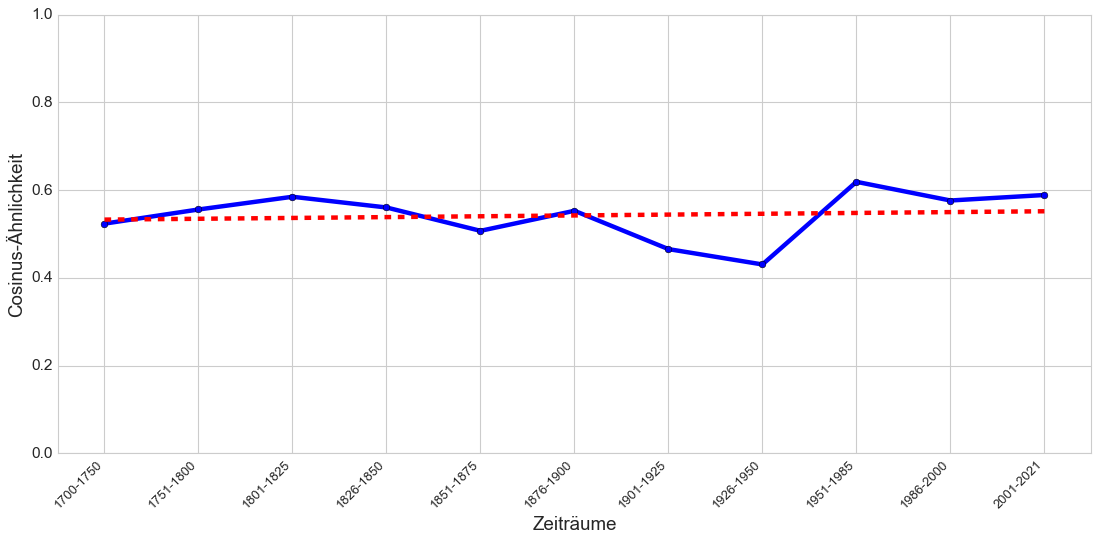

In [40]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'formidabilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [41]:
formidabilmente1 = compare_cos(periods, models, 'formidabilmente', 'angoscia')
formidabilmente2 = compare_cos(periods, models, 'formidabilmente', 'atterrire')
formidabilmente3 = compare_cos(periods, models, 'formidabilmente', 'panico')
formidabilmente4 = compare_cos(periods, models, 'formidabilmente', 'paura')
formidabilmente5 = compare_cos(periods, models, 'formidabilmente', 'raccapricciare')
formidabilmente6 = compare_cos(periods, models, 'formidabilmente', 'schifo')
formidabilmente7 = compare_cos(periods, models, 'formidabilmente', 'sgomentare')
formidabilmente8 = compare_cos(periods, models, 'formidabilmente', 'sgomento')
formidabilmente9 = compare_cos(periods, models, 'formidabilmente', 'spaventare')
formidabilmente10 = compare_cos(periods, models, 'formidabilmente', 'spavento')
formidabilmente11 = compare_cos(periods, models, 'formidabilmente', 'terrore')

In [42]:
formidabilmente_df = pd.DataFrame([formidabilmente1, formidabilmente2, formidabilmente3, formidabilmente4, formidabilmente5, formidabilmente6, formidabilmente7, formidabilmente8, formidabilmente9, formidabilmente10, formidabilmente11])

# Durchschnitt pro Zeitraum
formidabilmente_mean = dict(formidabilmente_df.mean())

# min pro Zeitraum
formidabilmente_min = dict(formidabilmente_df.min())
formidabilmente_min_list = [float(x) for x in list(formidabilmente_min.values())]

#max pro Zeitraum 
formidabilmente_max = dict(formidabilmente_df.max())
formidabilmente_max_list = [float(x) for x in list(formidabilmente_max.values())]

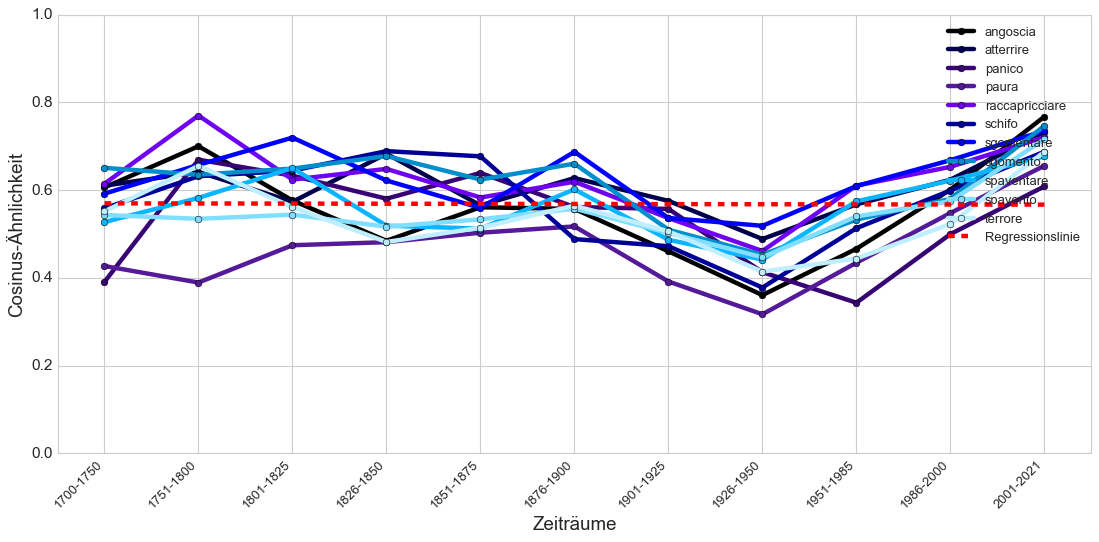

In [43]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, formidabilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, formidabilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, formidabilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, formidabilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, formidabilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, formidabilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, formidabilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, formidabilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, formidabilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, formidabilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

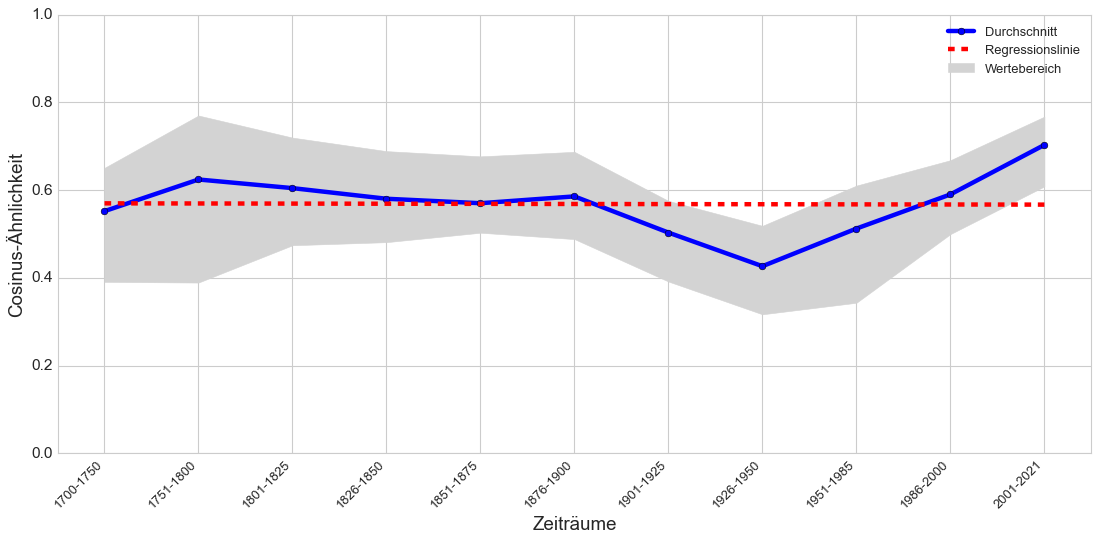

In [44]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, formidabilmente_max_list, formidabilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [45]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(scrupulosamente, 0.9691808819770813)","(vigorosamente, 0.9738147258758545)","(nitidamente, 0.9743934869766235)","(rigorosamente, 0.9755662679672241)","(fervorosamente, 0.9717249870300293)","(vigorosamente, 0.9735314249992371)","(prodigiosamente, 0.9602577686309814)","(smaniosamente, 0.9511017799377441)","(lussuosamente, 0.9674632549285889)","(voluttuosamente, 0.9603646397590637)","(gioiosamente, 0.9518559575080872)"
1,"(scrupolosamente, 0.9619712829589844)","(fervorosamente, 0.9720180630683899)","(sgarbatamente, 0.974251389503479)","(scrupolosamente, 0.9740687012672424)","(disdegnosamente, 0.969050943851471)","(virtuosamente, 0.9643612504005432)","(vigorosamente, 0.9582442045211792)","(ominosamente, 0.9479990005493164)","(oziosamente, 0.9618957042694092)","(noiosamente, 0.9442988038063049)","(curiosamente, 0.9496508240699768)"
2,"(diffusamente, 0.9561423063278198)","(miracolosamente, 0.9705367088317871)","(dignitosamente, 0.9740028381347656)","(maliziosamente, 0.9700563549995422)","(dignitosamente, 0.967007040977478)","(sfarzosamente, 0.9642012119293213)","(smisuratamente, 0.9480528831481934)","(vetrosamente, 0.9438833594322205)","(morbosamente, 0.9602022767066956)","(morbosamente, 0.943379282951355)","(gelosamente, 0.9453272819519043)"
3,"(falsamente, 0.9550628662109375)","(gelosamente, 0.9691016674041748)","(validamente, 0.973473846912384)","(vigorosamente, 0.9685332179069519)","(vigorosamente, 0.9668369293212891)","(rigorosamente, 0.9632956385612488)","(velenosamente, 0.9471648335456848)","(golosamente, 0.9438279271125793)","(laboriosamente, 0.9567777514457703)","(pomposamente, 0.9391699433326721)","(affannosamente, 0.9435282945632935)"
4,"(obbrobriosamente, 0.9538730382919312)","(goffamente, 0.9689038991928101)","(balordamente, 0.9729136824607849)","(sgarbatamente, 0.9684489965438843)","(rigorosamente, 0.9647969603538513)","(infruttuosamente, 0.9628452062606812)","(virtuosamente, 0.9462906122207642)","(nervosamente, 0.9427260756492615)","(ariosamente, 0.9563959240913391)","(gelosamente, 0.938419759273529)","(rabbiosamente, 0.9393527507781982)"
5,"(favolosamente, 0.9517611265182495)","(decorosamente, 0.9678735733032227)","(avidamente, 0.9721592664718628)","(animosamente, 0.9672606587409973)","(gelosamente, 0.9636937379837036)","(stizzosamente, 0.9597355127334595)","(artificiosamente, 0.9457712173461914)","(sfarzosamente, 0.9387975931167603)","(stizzosamente, 0.95591801404953)","(copiosamente, 0.9379452466964722)","(generosamente, 0.9371572732925415)"
6,"(miracolosamente, 0.9503169655799866)","(rozzamente, 0.9673565030097961)","(stolidamente, 0.9714969396591187)","(calunniosamente, 0.967009961605072)","(insidiosamente, 0.9607633948326111)","(sdegnosamente, 0.9594030976295471)","(operosamente, 0.945202112197876)","(rabbiosamente, 0.9379079937934875)","(fruttuosamente, 0.955815851688385)","(sontuosamente, 0.9364250898361206)","(misteriosamente, 0.936409056186676)"
7,"(gelosamente, 0.9492506384849548)","(viziosamente, 0.9667379856109619)","(nudamente, 0.9686053991317749)","(dignitosamente, 0.9660854339599609)","(tumultuosamente, 0.9591560363769531)","(rotondamente, 0.959062397480011)","(fervorosamente, 0.942725658416748)","(vezzosamente, 0.9369435906410217)","(gloriosamente, 0.9553831219673157)","(gioiosamente, 0.9350191950798035)","(furiosamente, 0.9346677660942078)"
8,"(profusamente, 0.9485944509506226)","(sontuosamente, 0.9656944274902344)","(lucidamente, 0.9670481085777283)","(miracolosamente, 0.9655750393867493)","(erroneamente, 0.9588181972503662)","(insidiosamente, 0.9589407444000244)","(rigorosamente, 0.9415852427482605)","(paurosamente, 0.9368335008621216)","(golosamente, 0.9547894597053528)","(rovinosamente, 0.9344509243965149)","(nervosamente, 0.934369683265686)"
9,"(seriosamente, 0.9479267001152039)","(profusamente, 0.9653468132019043)","(benignamente, 0.9663652777671814)","(deliziosamente, 0.9654456377

In [46]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.5169612765312195,
 '1751-1800': 0.5667258501052856,
 '1801-1825': 0.5903816223144531,
 '1826-1850': 0.5490360856056213,
 '1851-1875': 0.49853143095970154,
 '1876-1900': 0.4956374764442444,
 '1901-1925': 0.4526078701019287,
 '1926-1950': 0.40448901057243347,
 '1951-1985': 0.5488401055335999,
 '1986-2000': 0.6061612367630005,
 '2001-2021': 0.6305245757102966}

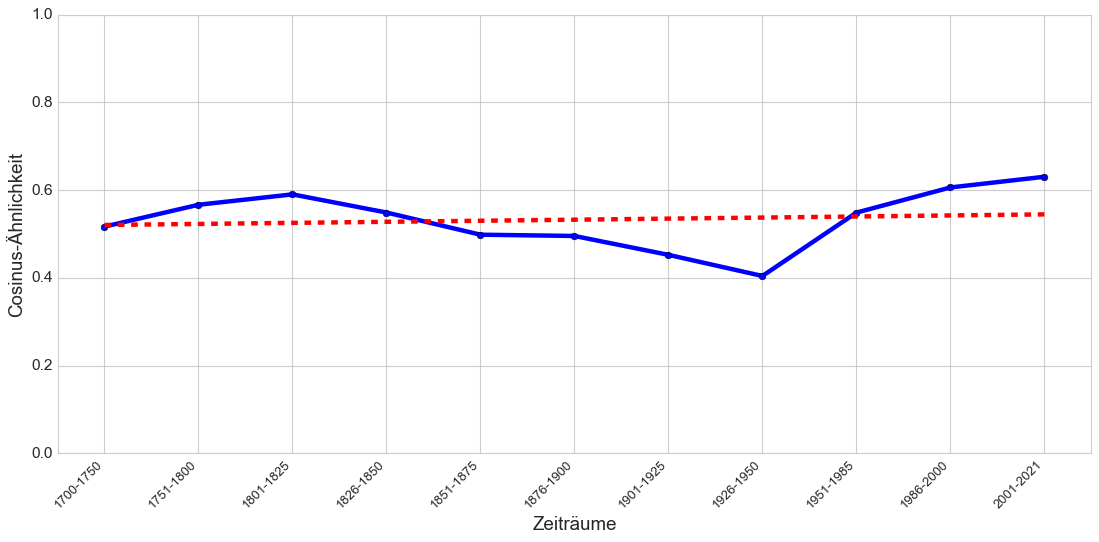

In [47]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [48]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [49]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

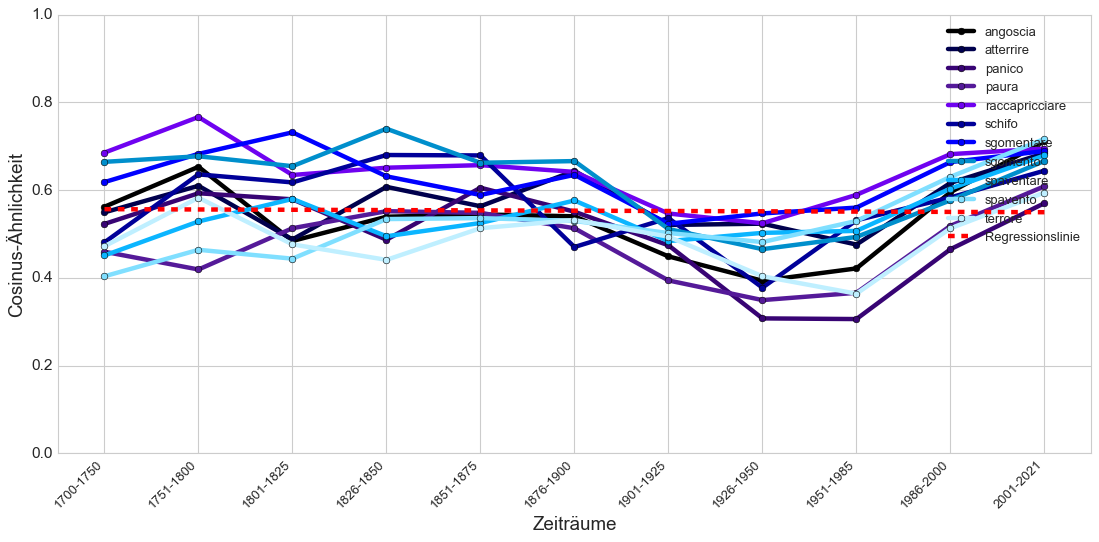

In [50]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

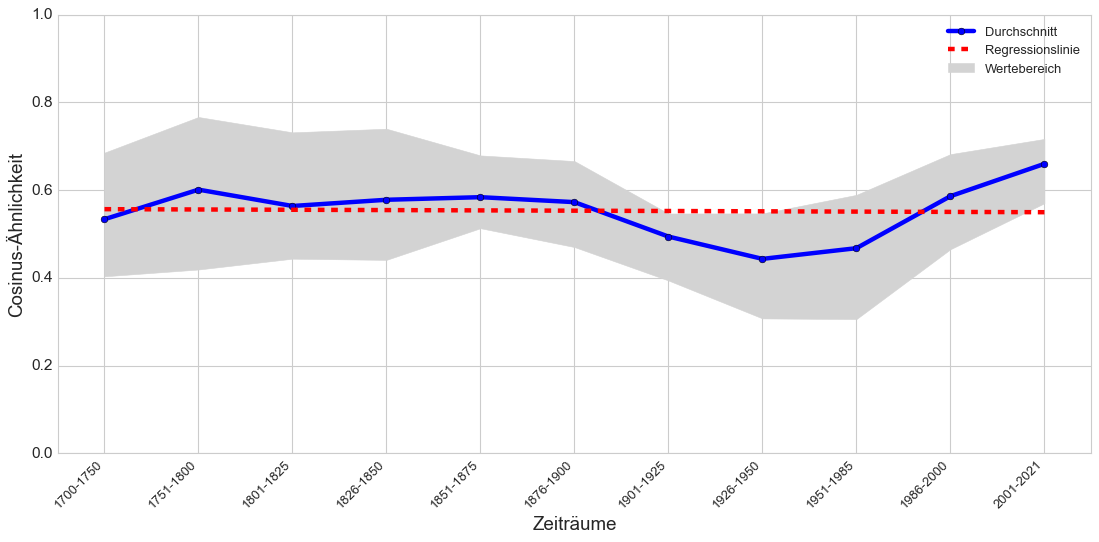

In [51]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [52]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(obliquamente, 0.9632612466812134)","(placidamente, 0.9666709303855896)","(tremendamente, 0.9756579399108887)","(cupidamente, 0.9664003849029541)","(tremendamente, 0.9640678763389587)","(rotondamente, 0.9581308364868164)","(fulgidamente, 0.9522179961204529)","(ruvidamente, 0.9696322083473206)","(avidamente, 0.9653913378715515)","(stupendamente, 0.939607560634613)","(furiosamente, 0.9426319599151611)"
1,"(lividamente, 0.9518203735351562)","(timidamente, 0.966575026512146)","(placidamente, 0.9666866064071655)","(timidamente, 0.9641395211219788)","(rigidamente, 0.9569381475448608)","(crudamente, 0.9563083052635193)","(ruvidamente, 0.9444712996482849)","(crudamente, 0.9684105515480042)","(ruvidamente, 0.963576078414917)","(orribilmente, 0.9365731477737427)","(angosciosamente, 0.940829873085022)"
2,"(gelosamente, 0.9472482800483704)","(crudamente, 0.966533899307251)","(cupidamente, 0.9655810594558716)","(spietatamente, 0.9617812037467957)","(stolidamente, 0.9544248580932617)","(aspramente, 0.9530962705612183)","(cupidamente, 0.9423239827156067)","(goffamente, 0.9672567844390869)","(gelidamente, 0.9624826312065125)","(atrocemente, 0.9272518754005432)","(gelosamente, 0.9389368295669556)"
3,"(obbliquamente, 0.9462552666664124)","(freddamente, 0.9643442630767822)","(timidamente, 0.9605064392089844)","(validamente, 0.9609172344207764)","(solidamente, 0.9542292952537537)","(goffamente, 0.9512535333633423)","(placidamente, 0.9396503567695618)","(gelidamente, 0.965628445148468)","(radamente, 0.9608433842658997)","(ferocemente, 0.9236987829208374)","(gioiosamente, 0.9346241354942322)"
4,"(scrupulosamente, 0.9445796012878418)","(languidamente, 0.9638900756835938)","(rapidamente, 0.9589117765426636)","(sordamente, 0.9602869153022766)","(intrepidamente, 0.951839804649353)","(rigidamente, 0.9495415091514587)","(goffamente, 0.9384905695915222)","(torbidamente, 0.964786171913147)","(lucidamente, 0.9576531052589417)","(morbosamente, 0.9200790524482727)","(goffamente, 0.9331281185150146)"
5,"(freddamente, 0.9438630938529968)","(avidamente, 0.9631478786468506)","(istupidamente, 0.9561390280723572)","(freddamente, 0.9596315622329712)","(stupendamente, 0.9518162608146667)","(mostruosamente, 0.9471224546432495)","(tremendamente, 0.9383026957511902)","(stupendamente, 0.9640088677406311)","(placidamente, 0.9574725031852722)","(furiosamente, 0.9184511303901672)","(misteriosamente, 0.9327597618103027)"
6,"(iniquamente, 0.9432382583618164)","(lepidamente, 0.9628123641014099)","(nitidamente, 0.9548153281211853)","(ruvidamente, 0.9596313834190369)","(tiepidamente, 0.9501233696937561)","(enormemente, 0.9469901323318481)","(obliquamente, 0.935633659362793)","(ingordamente, 0.9632028341293335)","(laidamente, 0.9570778012275696)","(desolatamente, 0.9109964966773987)","(nervosamente, 0.9326822757720947)"
7,"(rapidamente, 0.9427379369735718)","(stolidamente, 0.9616518616676331)","(lucidamente, 0.9534186720848083)","(sgarbatamente, 0.9591658115386963)","(sordamente, 0.9496932625770569)","(nitidamente, 0.9465018510818481)","(velenosamente, 0.9348379969596863)","(aridamente, 0.9624029397964478)","(nitidamente, 0.9566446542739868)","(spavaldamente, 0.9060710072517395)","(freddamente, 0.9300643801689148)"
8,"(furtivamente, 0.9426047801971436)","(fervidamente, 0.961281955242157)","(nudamente, 0.9532098174095154)","(furtivamente, 0.9591187834739685)","(nitidamente, 0.9489767551422119)","(caldamente, 0.9461095929145813)","(gelidamente, 0.9343396425247192)","(buffamente, 0.9623735547065735)","(saldamente, 0.9558757543563843)","(fragorosamente, 0.9058175086975098)","(languidamente, 0.9294135570526123)"
9,"(cupidamente, 0.9420017004013062)","(rapidamente, 0.9604967832565308)","(balordamente, 0.9521085619926453)","(stolidamente, 0.9572112560272217)","(ruvidamente, 0.9480753540992737)","(falsamente, 0.9460036158561707)","(enormemente, 0.9338740706443787)","(bravamen

In [53]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1700-1750': 0.48775166273117065,
 '1751-1800': 0.5285996198654175,
 '1801-1825': 0.5567702054977417,
 '1826-1850': 0.5228283405303955,
 '1851-1875': 0.4394845962524414,
 '1876-1900': 0.463120698928833,
 '1901-1925': 0.42722779512405396,
 '1926-1950': 0.38375312089920044,
 '1951-1985': 0.5000395178794861,
 '1986-2000': 0.44801193475723267,
 '2001-2021': 0.560663640499115}

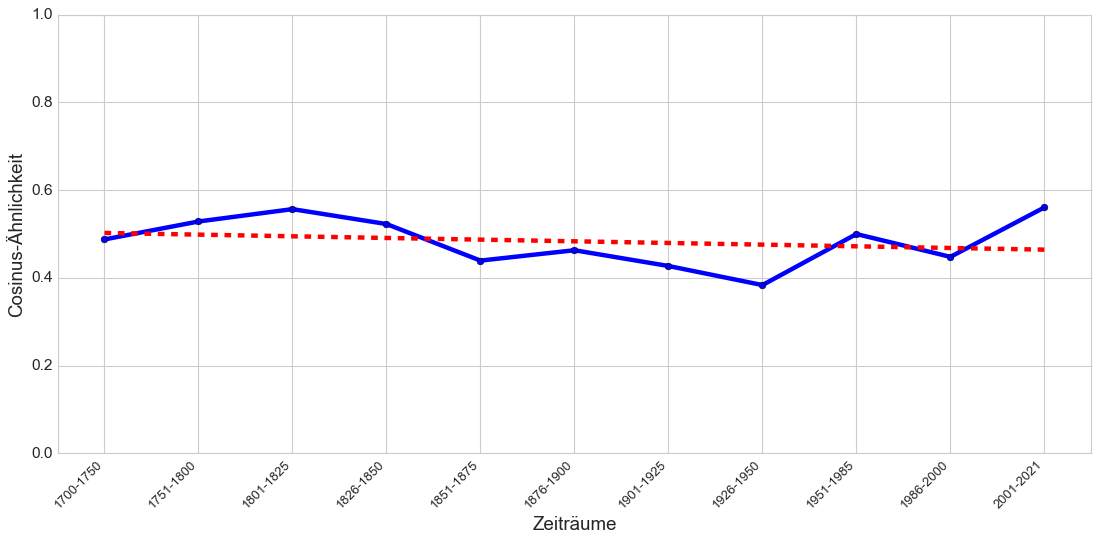

In [54]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [55]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [56]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

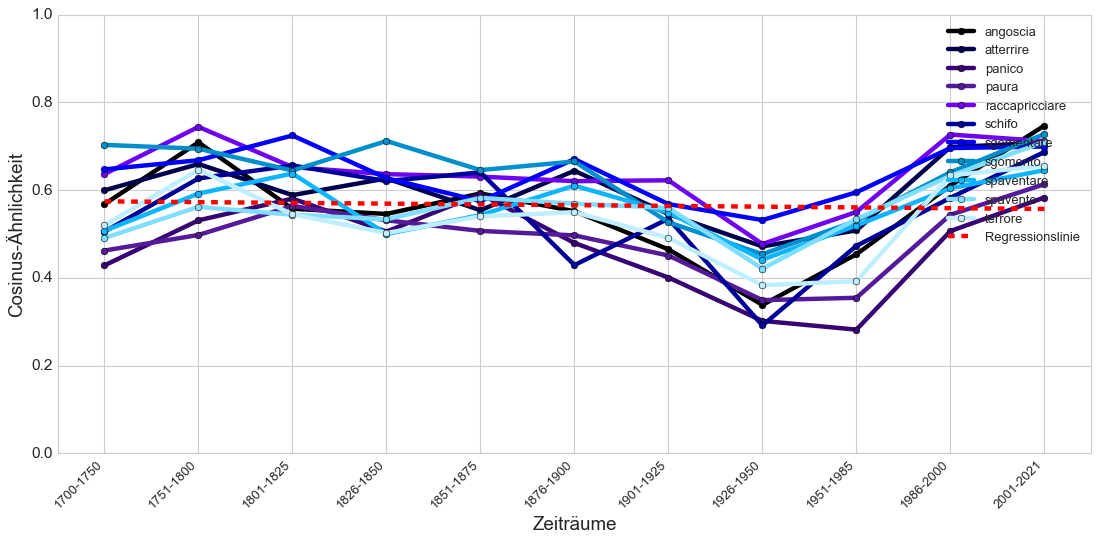

In [57]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

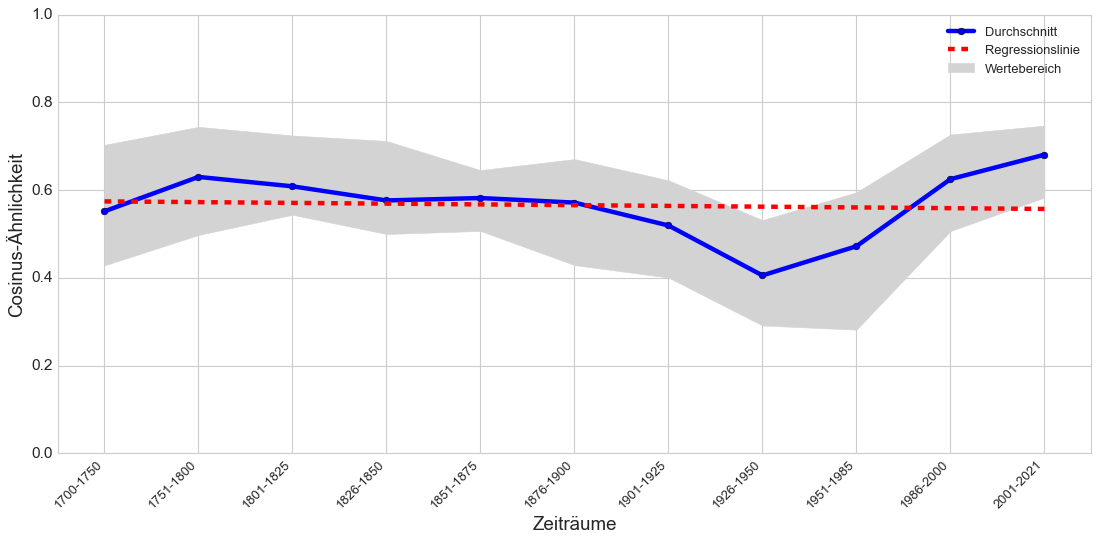

In [58]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [59]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(terribilmente, 0.9500841498374939)","(terribilmente, 0.9753835201263428)","(terribilmente, 0.9792724847793579)","(terribilmente, 0.9690632820129395)","(terribilmente, 0.9536839723587036)","(terribilmente, 0.966362476348877)","(terribilmente, 0.9645519256591797)","(terribilmente, 0.9713051915168762)","(terribilmente, 0.9626785516738892)","(terribilmente, 0.9632788300514221)","(terribilmente, 0.9667328596115112)"
1,"(orridamente, 0.9215339422225952)","(immobilmente, 0.9497050046920776)","(immobilmente, 0.9602657556533813)","(immobilmente, 0.9482837319374084)","(visibilmente, 0.9294219017028809)","(flebilmente, 0.9076272249221802)","(visibilmente, 0.9237891435623169)","(impassibilmente, 0.9365429282188416)","(umilmente, 0.939766526222229)","(orrendamente, 0.9365731477737427)","(atrocemente, 0.9468347430229187)"
2,"(fremente, 0.9151362180709839)","(infallibilmente, 0.9346683621406555)","(infallibilmente, 0.9396370053291321)","(inesauribilmente, 0.9417176842689514)","(irremovibilmente, 0.9255504012107849)","(visibilmente, 0.9050705432891846)","(invisibilmente, 0.9148468375205994)","(flebilmente, 0.9283581376075745)","(atrocemente, 0.9306547045707703)","(crudelmente, 0.9361555576324463)","(ferocemente, 0.9373411536216736)"
3,"(atrocemente, 0.9135695695877075)","(irremissibilmente, 0.9336958527565002)","(crudelmente, 0.9384552836418152)","(visibilmente, 0.9335174560546875)","(spaventosamente, 0.9033899903297424)","(indicibilmente, 0.9045677781105042)","(ineffabilmente, 0.8863897323608398)","(incredibilmente, 0.9220689535140991)","(invisibilmente, 0.9277343153953552)","(amabilmente, 0.9336884021759033)","(dolcemente, 0.9330431818962097)"
4,"(ondifremente, 0.9130033254623413)","(irreparabilmente, 0.9247469902038574)","(ineffabilmente, 0.9355676174163818)","(invisibilmente, 0.9308466911315918)","(spaventevolmente, 0.8975334763526917)","(febbrilmente, 0.9037435054779053)","(incredibilmente, 0.8828482627868652)","(infallibilmente, 0.9203005433082581)","(amabilmente, 0.9262346029281616)","(inguaribilmente, 0.9331040382385254)","(umilmente, 0.9319618344306946)"
5,"(infallibilmente, 0.9060800075531006)","(imminente, 0.9225242733955383)","(spaventosamente, 0.929490327835083)","(velocemente, 0.9229109883308411)","(convulsamente, 0.8828058242797852)","(irremissibilmente, 0.8999911546707153)","(irremissibilmente, 0.8827770352363586)","(tangibilmente, 0.9082207679748535)","(crudelmente, 0.9258127212524414)","(umilmente, 0.9321844577789307)","(angosciosamente, 0.9314618706703186)"
6,"(spaventosamente, 0.9020909070968628)","(languidamente, 0.9220978617668152)","(impreferibilmente, 0.9293040037155151)","(ferocemente, 0.9228436946868896)","(leggiermente, 0.8824602365493774)","(invincibilmente, 0.8955549001693726)","(orrendamente, 0.8786932826042175)","(visibilmente, 0.903701663017273)","(inesorabilmente, 0.9207288026809692)","(infantilmente, 0.9320186972618103)","(brutalmente, 0.9273594617843628)"
7,"(miserabilmente, 0.9019597172737122)","(visibilmente, 0.9179229140281677)","(plausibilmente, 0.9286049008369446)","(sparsamente, 0.9177974462509155)","(febbrilmente, 0.8819431662559509)","(ferocemente, 0.88786780834198)","(immobilmente, 0.8762096166610718)","(preferibilmente, 0.902183473110199)","(inguaribilmente, 0.9203017354011536)","(inesorabilmente, 0.9280127882957458)","(orrendamente, 0.9251317977905273)"
8,"(irremissibilmente, 0.9008071422576904)","(atrocemente, 0.9164555668830872)","(irrepugnabilmente, 0.9284014105796814)","(pallidamente, 0.9128193855285645)","(incredibilmente, 0.8764955997467041)","(irrepugnabilmente, 0.8868513107299805)","(insensibilmente, 0.8727178573608398)","(implacabilmente, 0.8897797465324402)","(volubilmente, 0.9194103479385376)","(abilmente, 0.9278863072395325)","(minacciosamente, 0.9234694242477417)"
9,"(immobilmente, 0.8975128531455994)","(ferocemente, 0.9139044284820557)","(invisibilmente, 0.92803651094436

In [60]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.45745065808296204,
 '1751-1800': 0.4641914665699005,
 '1801-1825': 0.5547382235527039,
 '1826-1850': 0.45559775829315186,
 '1851-1875': 0.4027348756790161,
 '1876-1900': 0.4324728548526764,
 '1901-1925': 0.4091836214065552,
 '1926-1950': 0.43977510929107666,
 '1951-1985': 0.5288326144218445,
 '1986-2000': 0.5082574486732483,
 '2001-2021': 0.5035507082939148}

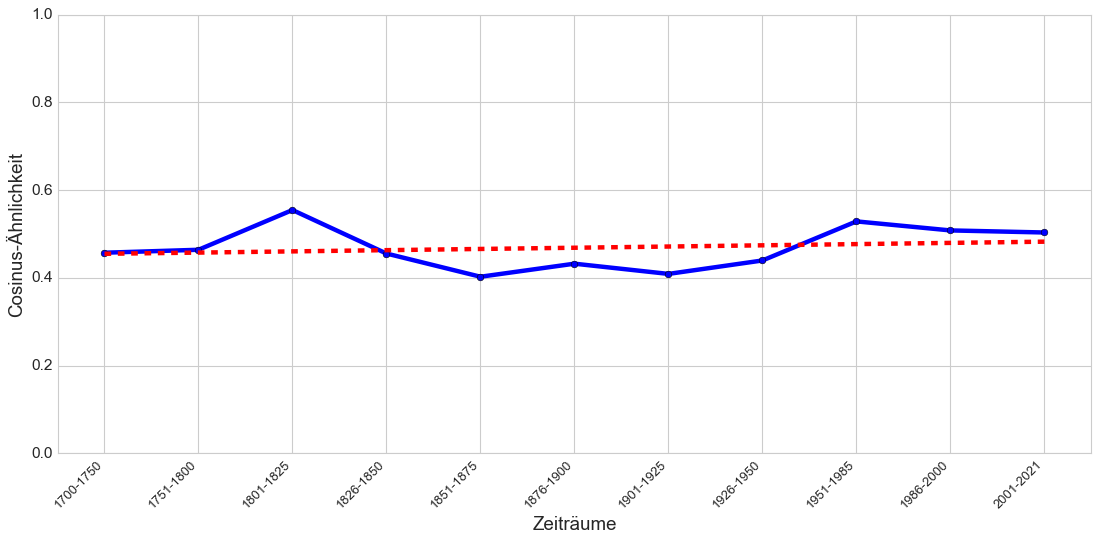

In [61]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [62]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [63]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

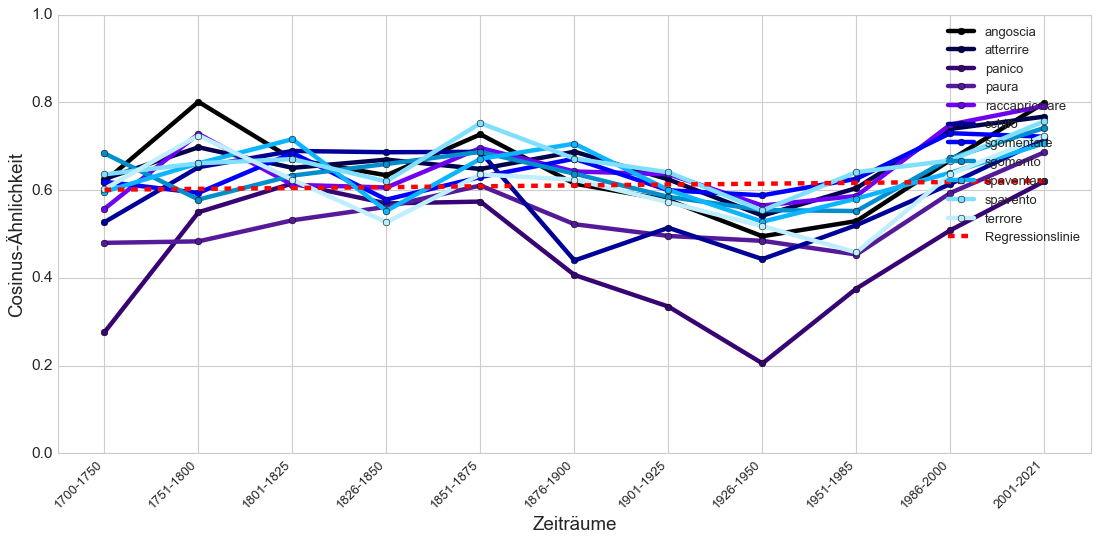

In [64]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

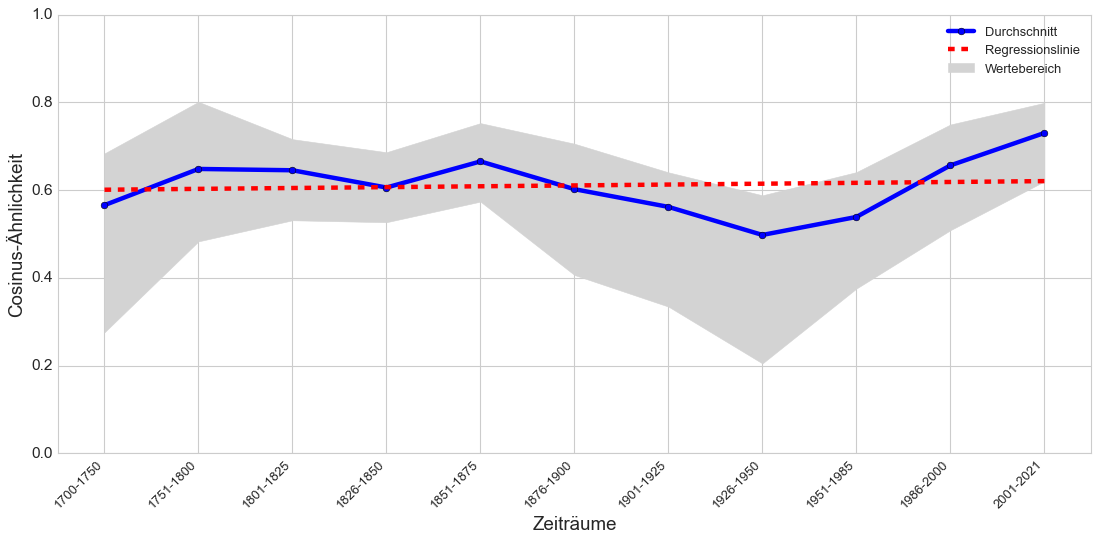

In [65]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [66]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(tumultuosamente, 0.9232088327407837)","(furiosamente, 0.9588255882263184)","(affannosamente, 0.9409636855125427)","(improvisamente, 0.9247077107429504)","(affannosamente, 0.9401461482048035)","(rabbiosamente, 0.9302517175674438)","(furiosamente, 0.9279565811157227)","(paurosamente, 0.9370817542076111)","(paurosamente, 0.9488888382911682)","(rovinosamente, 0.9443994760513306)","(affannosamente, 0.9532595276832581)"
1,"(furiosamente, 0.9223515391349792)","(fastosamente, 0.9480701684951782)","(velenosamente, 0.9407586455345154)","(impetuosamente, 0.9194995164871216)","(tormentosamente, 0.9364966154098511)","(furiosamente, 0.9282758235931396)","(rabbiosamente, 0.9265011548995972)","(impetuosamente, 0.9318168759346008)","(rabbiosamente, 0.948805570602417)","(miracolosamente, 0.9436420798301697)","(rabbiosamente, 0.9522046446800232)"
2,"(orridamente, 0.9142345786094666)","(rabbiosamente, 0.9473062753677368)","(furiosamente, 0.938030481338501)","(fragorosamente, 0.9187796115875244)","(rabbiosamente, 0.9342989325523376)","(minacciosamente, 0.9268708825111389)","(strepitosamente, 0.924836277961731)","(turbinosamente, 0.9287680983543396)","(vanitosamente, 0.9401743412017822)","(vertiginosamente, 0.9362906217575073)","(gelosamente, 0.9520609974861145)"
3,"(gelosamente, 0.9120339155197144)","(gelosamente, 0.9448025226593018)","(precipitosamente, 0.9360460042953491)","(furiosamente, 0.9169738292694092)","(spaventevolmente, 0.9323580265045166)","(impetuosamente, 0.926214873790741)","(paurosamente, 0.9206346273422241)","(rabbiosamente, 0.9262285828590393)","(pietosamente, 0.9381084442138672)","(dignitosamente, 0.9357708096504211)","(angosciosamente, 0.9495559334754944)"
4,"(strepitosamente, 0.9118331074714661)","(precipitosamente, 0.9438416957855225)","(fugacemente, 0.9336415529251099)","(improvvisamente, 0.9168511033058167)","(convulsamente, 0.9305534958839417)","(tortuosamente, 0.9258167147636414)","(impetuosamente, 0.9199306964874268)","(furiosamente, 0.925896406173706)","(furiosamente, 0.9352800250053406)","(paurosamente, 0.9343951344490051)","(nervosamente, 0.9488482475280762)"
5,"(atrocemente, 0.9070020318031311)","(sparsamente, 0.940544605255127)","(orrendamente, 0.9332783818244934)","(rabbiosamente, 0.9161289930343628)","(paurosamente, 0.928276538848877)","(paurosamente, 0.9229563474655151)","(smorfiosamente, 0.9115866422653198)","(fragorosamente, 0.9198031425476074)","(lussuosamente, 0.9350752234458923)","(sontuosamente, 0.9332973957061768)","(vertiginosamente, 0.9486182928085327)"
6,"(improvvisamente, 0.9021607041358948)","(placidamente, 0.9404943585395813)","(furbamente, 0.9310311079025269)","(improvvidamente, 0.912722110748291)","(furiosamente, 0.9277322292327881)","(smaniosamente, 0.9210228323936462)","(angosciosamente, 0.9084187746047974)","(voluttuosamente, 0.919245183467865)","(tortuosamente, 0.9344168901443481)","(morbosamente, 0.9316616654396057)","(gioiosamente, 0.9469485282897949)"
7,"(orribilmente, 0.902090847492218)","(sontuosamente, 0.9401853084564209)","(baldanzosamente, 0.9303236603736877)","(sparsamente, 0.9120514392852783)","(rumorosamente, 0.9216102957725525)","(affannosamente, 0.9207415580749512)","(affannosamente, 0.9082773923873901)","(rumorosamente, 0.9153645634651184)","(turbinosamente, 0.9337400197982788)","(rumorosamente, 0.9312722682952881)","(faticosamente, 0.9444403648376465)"
8,"(improvisamente, 0.8992905020713806)","(dispettosamente, 0.9401147365570068)","(orribilmente, 0.929490327835083)","(calorosamente, 0.9105170965194702)","(impetuosamente, 0.9210547804832458)","(languidamente, 0.918278157711029)","(vanitosamente, 0.905837893486023)","(tortuosamente, 0.9150017499923706)","(irosamente, 0.9303491115570068)","(noiosamente, 0.927839994430542)","(rovinosamente, 0.9443743824958801)"
9,"(fastosamente, 0.8985154032707214)","(pietosamente, 0.9400361180305481)","(nascosamente, 0.9283653497695923

In [67]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.47646281123161316,
 '1751-1800': 0.5201435089111328,
 '1801-1825': 0.5220138430595398,
 '1826-1850': 0.44747835397720337,
 '1851-1875': 0.3948223888874054,
 '1876-1900': 0.4013192355632782,
 '1901-1925': 0.35970136523246765,
 '1926-1950': 0.31643420457839966,
 '1951-1985': 0.5103318691253662,
 '1986-2000': 0.614723801612854,
 '2001-2021': 0.6148570775985718}

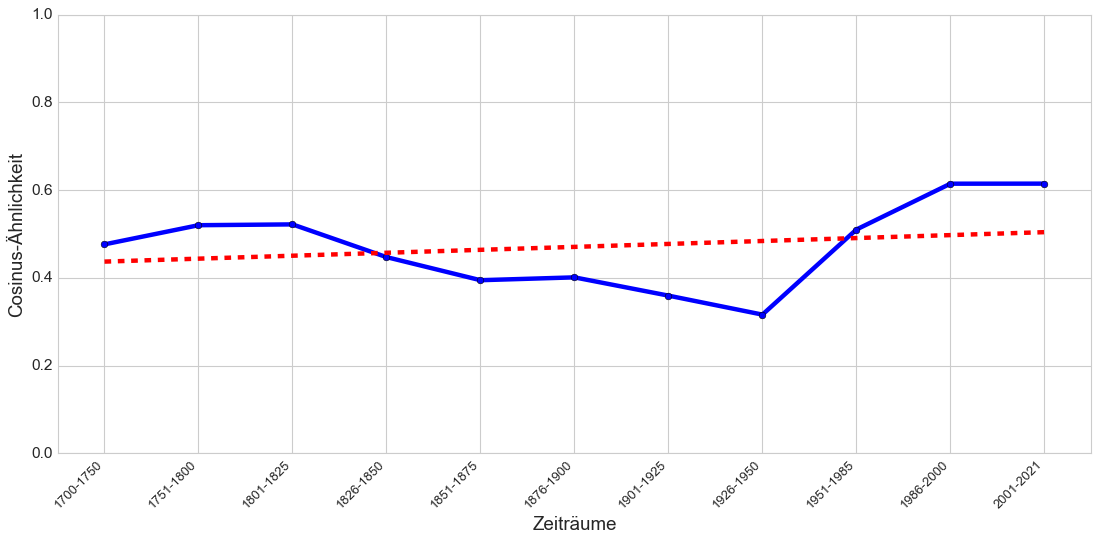

In [68]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [69]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [70]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

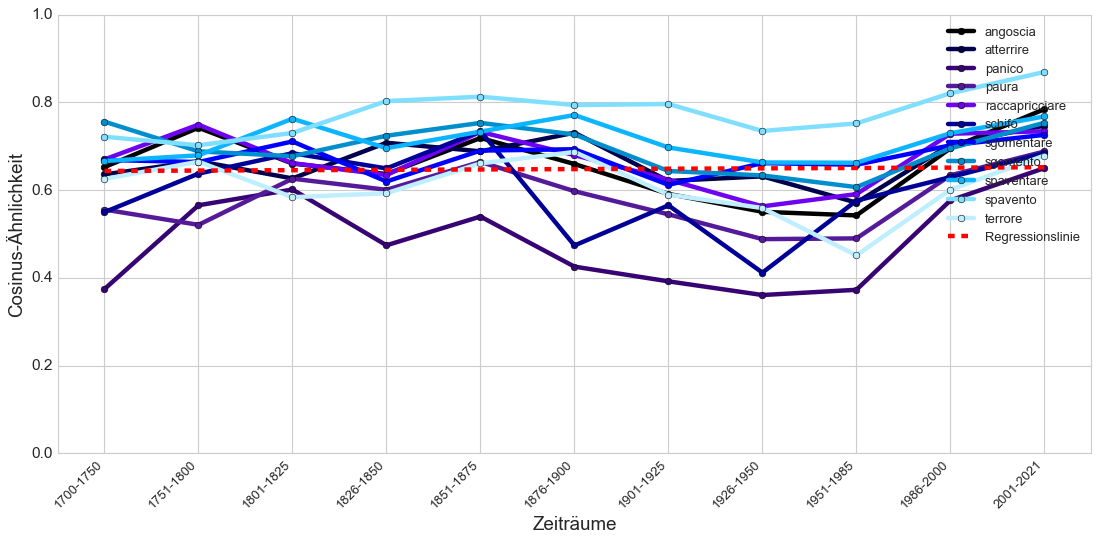

In [71]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

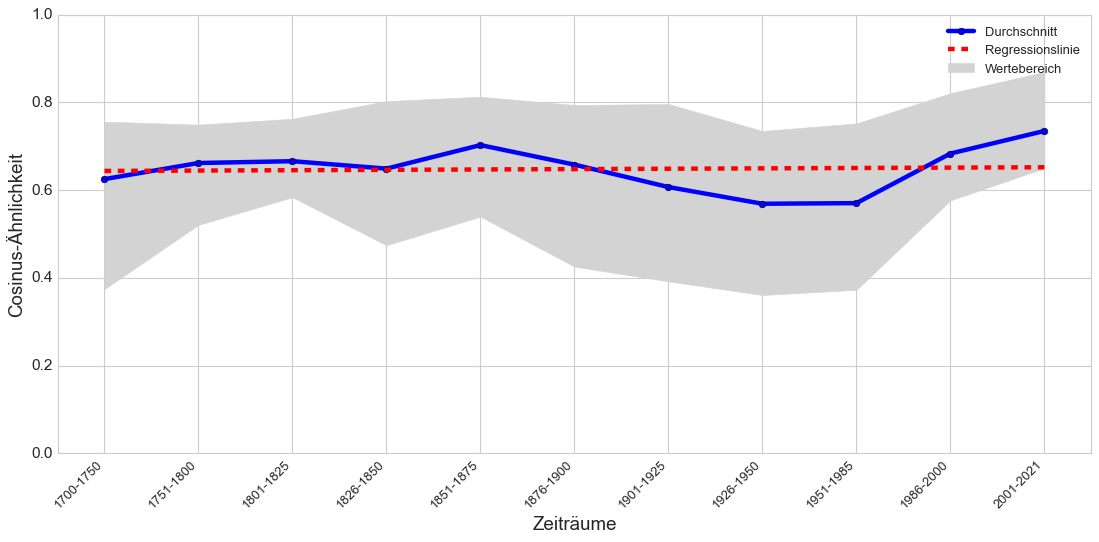

In [72]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [73]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(orribilmente, 0.9500842094421387)","(orribilmente, 0.9753835797309875)","(orribilmente, 0.9792725443840027)","(orribilmente, 0.9690631628036499)","(orribilmente, 0.9536840915679932)","(orribilmente, 0.9663625955581665)","(orribilmente, 0.9645519852638245)","(orribilmente, 0.9713051915168762)","(orribilmente, 0.9626786112785339)","(orribilmente, 0.9632787108421326)","(orribilmente, 0.9667328596115112)"
1,"(irreparabilmente, 0.9153286814689636)","(immobilmente, 0.9395973086357117)","(immobilmente, 0.9578074216842651)","(inesauribilmente, 0.9550346732139587)","(irremovibilmente, 0.9381435513496399)","(spaventevolmente, 0.9091961979866028)","(visibilmente, 0.9160116314888)","(infallibilmente, 0.9271059632301331)","(inesorabilmente, 0.9368185997009277)","(irreparabilmente, 0.944387674331665)","(crudelmente, 0.9489995837211609)"
2,"(miserabilmente, 0.911359429359436)","(irremissibilmente, 0.9395105838775635)","(irrepugnabilmente, 0.9361318945884705)","(invisibilmente, 0.9381425380706787)","(spaventevolmente, 0.9215799570083618)","(irremissibilmente, 0.9063951969146729)","(invisibilmente, 0.9105991721153259)","(flebilmente, 0.9265781044960022)","(inguaribilmente, 0.9315655827522278)","(mirabilmente, 0.9377546310424805)","(umilmente, 0.9481096267700195)"
3,"(irremissibilmente, 0.9080735445022583)","(infallibilmente, 0.9357357025146484)","(ineffabilmente, 0.9300215244293213)","(immobilmente, 0.9358368515968323)","(visibilmente, 0.9106331467628479)","(invincibilmente, 0.905512273311615)","(infallibilmente, 0.8994922041893005)","(incredibilmente, 0.9247753024101257)","(amabilmente, 0.9305436015129089)","(umilmente, 0.9340000152587891)","(brutalmente, 0.9457228183746338)"
4,"(abilmente, 0.907868504524231)","(irreparabilmente, 0.9318848252296448)","(infallibilmente, 0.9297546148300171)","(visibilmente, 0.9353593587875366)","(spaventosamente, 0.9012653231620789)","(febbrilmente, 0.9036433100700378)","(irremissibilmente, 0.8976004719734192)","(impassibilmente, 0.9193437695503235)","(labilmente, 0.9303818345069885)","(inesorabilmente, 0.933911144733429)","(innegabilmente, 0.9418062567710876)"
5,"(invariabilmente, 0.9042272567749023)","(imminente, 0.9234889149665833)","(inalterabilmente, 0.9290144443511963)","(miserabilmente, 0.9283677935600281)","(irremissibilmente, 0.8988825082778931)","(indicibilmente, 0.9032407402992249)","(incredibilmente, 0.8973110318183899)","(tangibilmente, 0.9159435629844666)","(umilmente, 0.9283624887466431)","(inguaribilmente, 0.9339056015014648)","(atrocemente, 0.9413630962371826)"
6,"(immobilmente, 0.9037962555885315)","(invincibilmente, 0.9175387620925903)","(impreferibilmente, 0.92775559425354)","(insanabilmente, 0.9243557453155518)","(improvvidamente, 0.8967880606651306)","(ferocemente, 0.9029195308685303)","(ineffabilmente, 0.8929998278617859)","(preferibilmente, 0.9129141569137573)","(irrimediabilmente, 0.9269047975540161)","(abilmente, 0.9312962293624878)","(inesorabilmente, 0.9399174451828003)"
7,"(inevitabilmente, 0.9007822275161743)","(irrevocabilmente, 0.9173332452774048)","(inesorabilmente, 0.9274799227714539)","(femminilmente, 0.9237179756164551)","(incredibilmente, 0.89673912525177)","(irrepugnabilmente, 0.9003456234931946)","(volubilmente, 0.8924228549003601)","(invincibilmente, 0.9051657915115356)","(infallibilmente, 0.9267863035202026)","(amabilmente, 0.9312747120857239)","(mirabilmente, 0.9399120211601257)"
8,"(indicibilmente, 0.9002756476402283)","(visibilmente, 0.9161610007286072)","(irreparabilmente, 0.9261069893836975)","(inesorabilmente, 0.9220189452171326)","(impreteribilmente, 0.8966512084007263)","(visibilmente, 0.8992430567741394)","(insanabilmente, 0.8874037861824036)","(crudelmente, 0.9013724327087402)","(incredibilmente, 0.925904393196106)","(imperdonabilmente, 0.9292298555374146)","(visibilmente, 0.9391046166419983)"
9,"(invisibilmente, 0.898199737071991)","(immutabilment

In [74]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.4527228772640228,
 '1751-1800': 0.4686853885650635,
 '1801-1825': 0.5447346568107605,
 '1826-1850': 0.4972476065158844,
 '1851-1875': 0.45601728558540344,
 '1876-1900': 0.4352026879787445,
 '1901-1925': 0.4185633957386017,
 '1926-1950': 0.4574742317199707,
 '1951-1985': 0.5650261640548706,
 '1986-2000': 0.529927670955658,
 '2001-2021': 0.564737856388092}

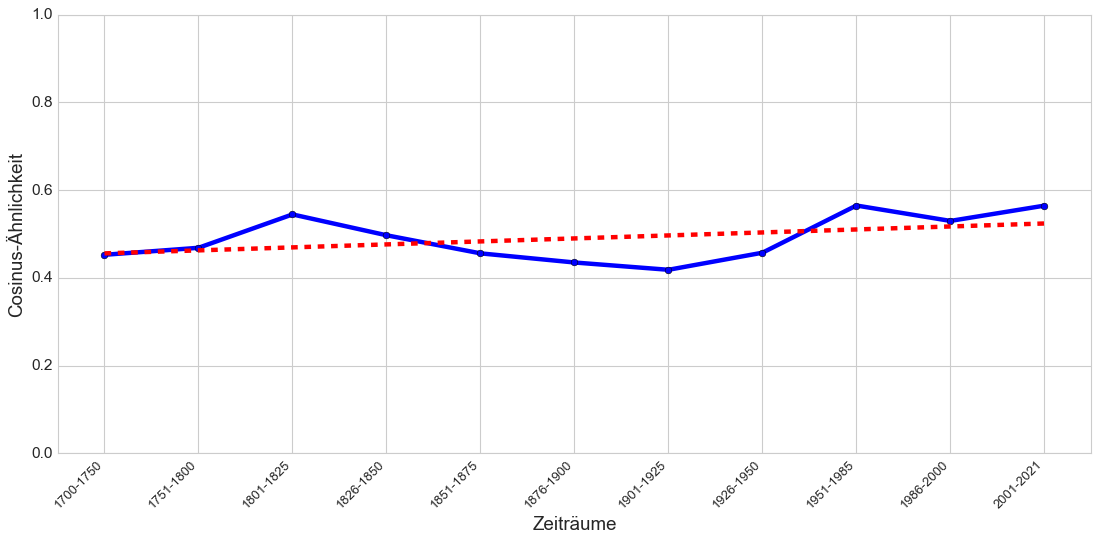

In [75]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')


plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

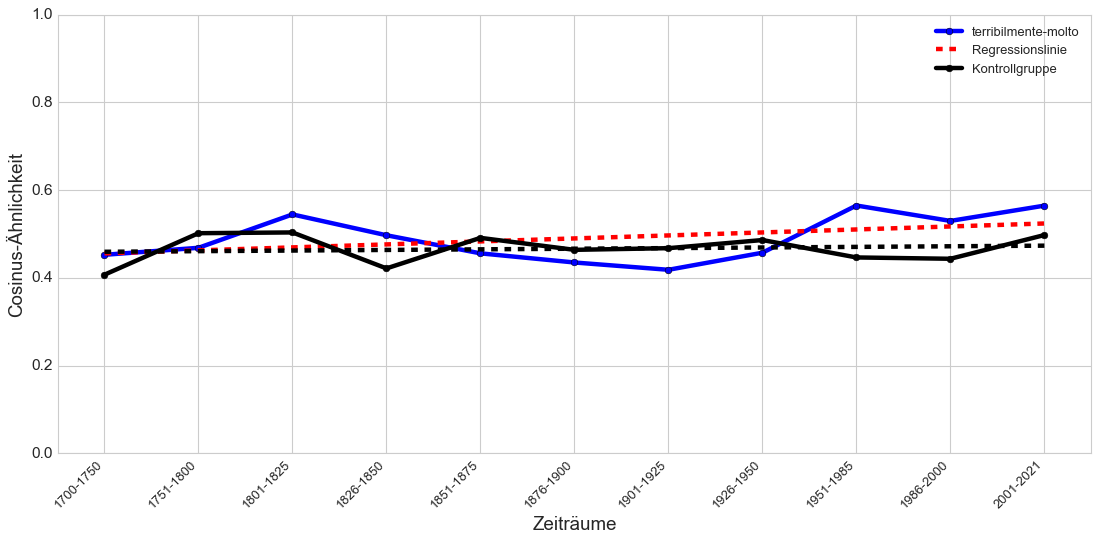

In [76]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [77]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [78]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

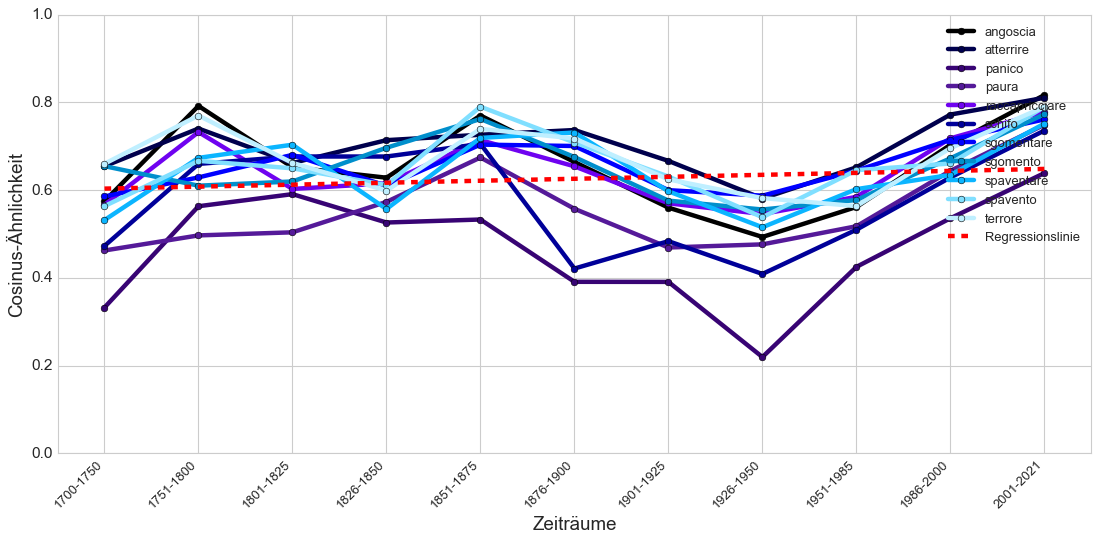

In [79]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

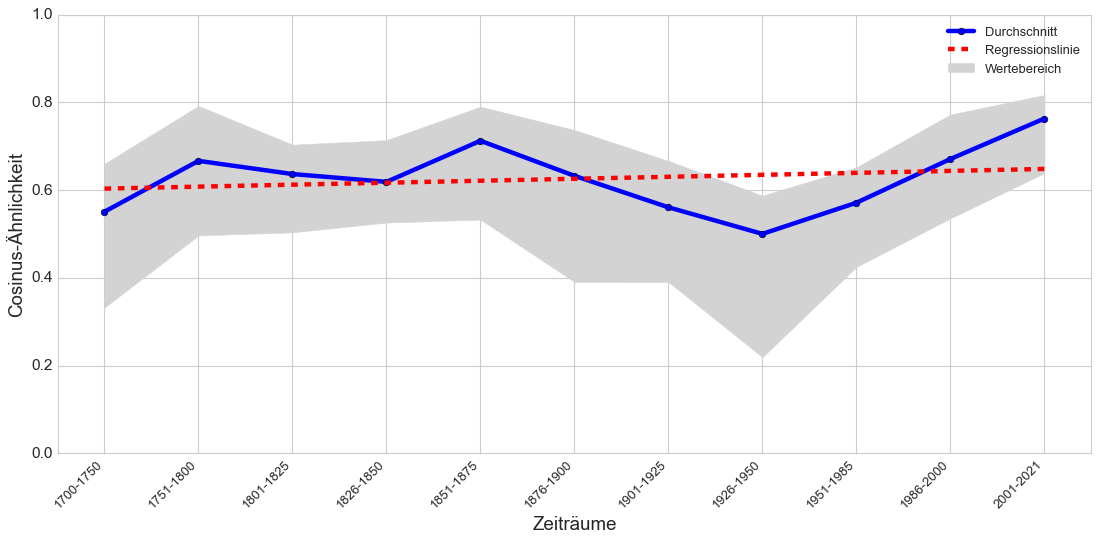

In [80]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [81]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(iniquamente, 0.9537100791931152)","(placidamente, 0.9670100212097168)","(placidamente, 0.9763043522834778)","(cupidamente, 0.9670071005821228)","(orrendamente, 0.9640678763389587)","(acremente, 0.9624935984611511)","(crudamente, 0.9427773952484131)","(orrendamente, 0.9539133310317993)","(placidamente, 0.9622382521629333)","(stupendamente, 0.9571009278297424)","(blandamente, 0.9480363130569458)"
1,"(obliquamente, 0.9510538578033447)","(sdegnosamente, 0.957507848739624)","(orrendamente, 0.9756579399108887)","(orrendamente, 0.9657261371612549)","(crudamente, 0.9609066247940063)","(fugacemente, 0.9591267108917236)","(acremente, 0.9398230314254761)","(crudamente, 0.9523376226425171)","(ruvidamente, 0.9598283171653748)","(crudamente, 0.9499289989471436)","(assurdamente, 0.9412010312080383)"
2,"(aspramente, 0.9458552598953247)","(crudamente, 0.9556277394294739)","(cupidamente, 0.9712513089179993)","(intrepidamente, 0.9657106399536133)","(stolidamente, 0.9581874012947083)","(alacremente, 0.9583075046539307)","(fremente, 0.9398161172866821)","(avidamente, 0.9509902596473694)","(trepidamente, 0.9579277038574219)","(stupidamente, 0.9491263628005981)","(stoicamente, 0.9347813129425049)"
3,"(freddamente, 0.9429293870925903)","(timidamente, 0.9526430368423462)","(timidamente, 0.9663792848587036)","(freddamente, 0.96457439661026)","(sordamente, 0.9545291662216187)","(cremente, 0.9512741565704346)","(fervidamente, 0.9396207332611084)","(gelidamente, 0.950716495513916)","(crudamente, 0.955933153629303)","(assurdamente, 0.9471064209938049)","(timidamente, 0.9340248703956604)"
4,"(cupidamente, 0.9424176216125488)","(fervidamente, 0.9505008459091187)","(istupidamente, 0.9651197791099548)","(fervidamente, 0.9640988707542419)","(timidamente, 0.9498218297958374)","(fremente, 0.947185754776001)","(orrendamente, 0.9383026361465454)","(sordamente, 0.9492673277854919)","(timidamente, 0.9558040499687195)","(timidamente, 0.9408729076385498)","(nitidamente, 0.9321846961975098)"
5,"(rapidamente, 0.9424078464508057)","(atrocemente, 0.949462890625)","(rapidamente, 0.9630351066589355)","(timidamente, 0.9624211192131042)","(ruvidamente, 0.9482294321060181)","(acerbamente, 0.945782482624054)","(veemente, 0.9382793307304382)","(timidamente, 0.9487960934638977)","(sordamente, 0.9544239640235901)","(lucidamente, 0.9399386644363403)","(ironicamente, 0.9315360188484192)"
6,"(lividamente, 0.9397194981575012)","(avidamente, 0.949020504951477)","(balordamente, 0.9622246026992798)","(placidamente, 0.9608131051063538)","(codardamente, 0.9471501708030701)","(crudamente, 0.9452606439590454)","(mitemente, 0.9382524490356445)","(bravamente, 0.9476147294044495)","(nitidamente, 0.9522477388381958)","(dolorosamente, 0.9380722045898438)","(laicamente, 0.930518388748169)"
7,"(turpemente, 0.9381504654884338)","(languidamente, 0.9482361078262329)","(avidamente, 0.9607847929000854)","(perfidamente, 0.9602814316749573)","(rigidamente, 0.9452322721481323)","(veemente, 0.9440206289291382)","(placidamente, 0.9356768727302551)","(falsamente, 0.9467798471450806)","(avidamente, 0.9504354596138)","(avidamente, 0.9377976655960083)","(magicamente, 0.9302639365196228)"
8,"(empiamente, 0.9361464977264404)","(perfidamente, 0.9474403858184814)","(nitidamente, 0.9602959156036377)","(acremente, 0.9597697257995605)","(intrepidamente, 0.9437717199325562)","(tenacemente, 0.9371732473373413)","(strenuamente, 0.9328845739364624)","(gelosamente, 0.9462324380874634)","(fervidamente, 0.9497629404067993)","(rabbiosamente, 0.9346394538879395)","(crudelmente, 0.9296182990074158)"
9,"(impunemente, 0.9323433041572571)","(stolidamente, 0.9455096125602722)","(nudamente, 0.960037350654602)","(spietatamente, 0.9579315781593323)","(goffamente, 0.9433122277259827)","(sdegnosamente, 0.9359953999519348)","(acerbamente, 0.9326780438423157)","(stupendamente, 0.946072518825531)","(acremente, 0.9475826025009155

In [82]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1700-1750': 0.4924429655075073,
 '1751-1800': 0.4780235290527344,
 '1801-1825': 0.5436300039291382,
 '1826-1850': 0.5088629126548767,
 '1851-1875': 0.41958269476890564,
 '1876-1900': 0.4569869041442871,
 '1901-1925': 0.4650072157382965,
 '1926-1950': 0.38083353638648987,
 '1951-1985': 0.5156785249710083,
 '1986-2000': 0.5743231177330017,
 '2001-2021': 0.6418706774711609}

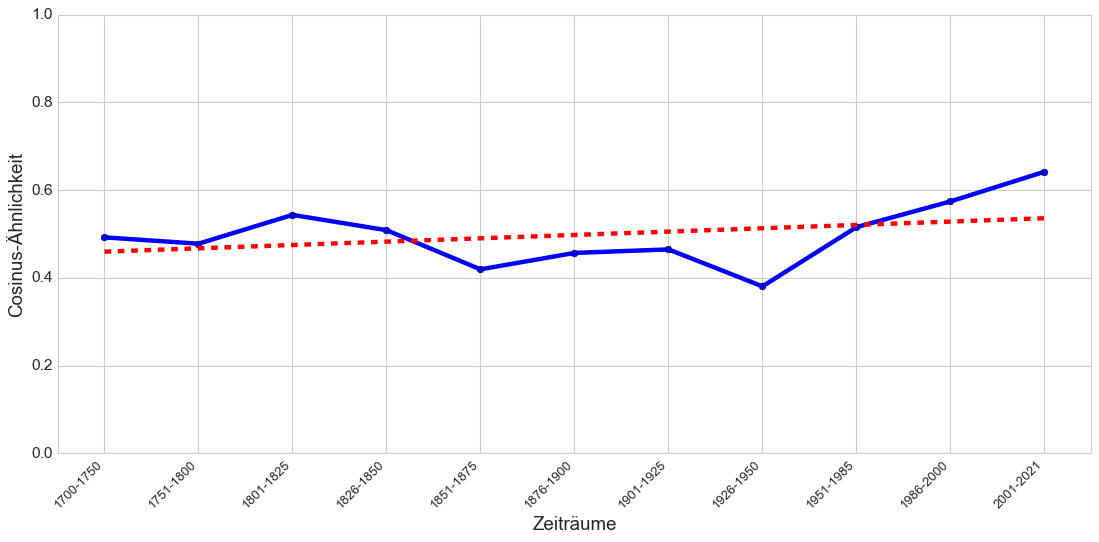

In [83]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [84]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [85]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

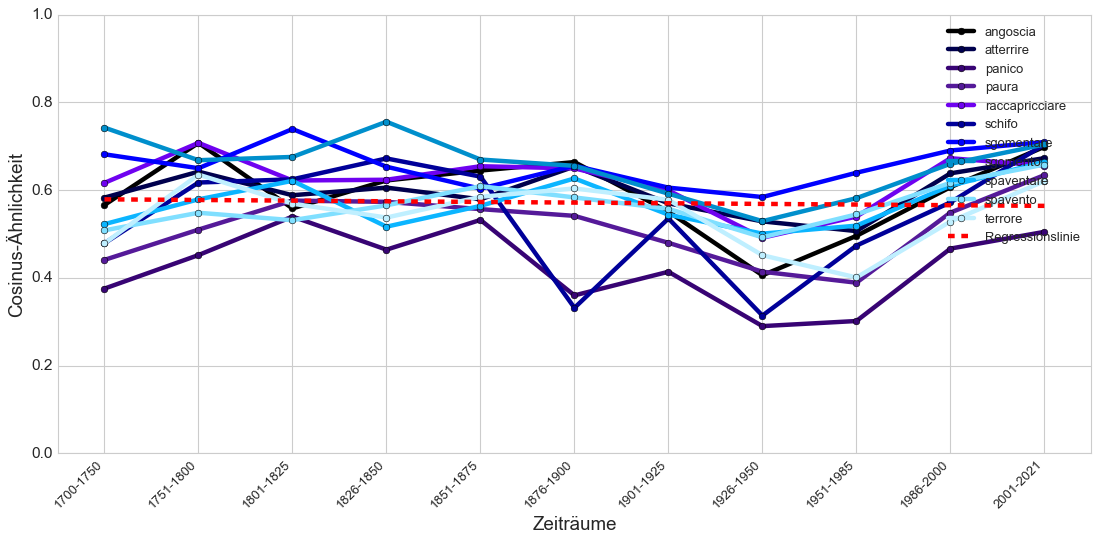

In [86]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

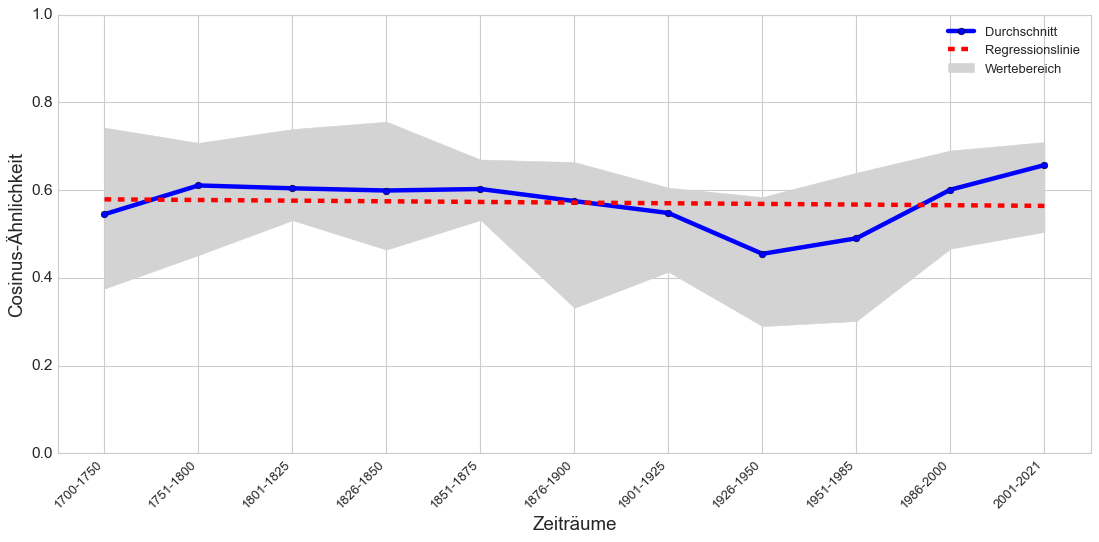

In [87]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()